In order to successfully complete this assignment you must:
1. Do the required reading, watch the provided videos and complete all instructions in this notebook.
2. The assignment must be submitted to the exercises folder in the `cmse802-yourlastname` repository on or before **10:00 am the day of the class**.  Late assignment will receive <=80% of the grade.

Students must come to class the next day prepared to discuss the material covered in this assignment. 

### <p style="text-align: right;"> &#9989; Put your name here:Pavan Yachamaneni </p>

---
# __Graph Theory I: introduction, container, and recursion__

# Learning objectives

At the end of the exercise, you should be able to:
- Use common container datatypes.
- Represent graphs as an adjacency matrix.
- Draw a graph based on an adjacency matrix.
- Explain how page rank is related to graph.
- Program recursive function.

# Outline

1. [Review of Containers](#Review_of_Containers)
1. [Very quick introduction to Graph Theory](#Very_quick_introduction_to_Graph_Theory)
1. [Graph applications: Page Rank](#pagerank)
1. [Graph and recursion](#Recursion_Example)
1. [Assignment wrap-up](#wrapup)


----
<a name="Review_of_Containers"></a>
# 1. Review of Containers

## 1.1 What are containers?

Python __containers__ are data types that can hold and iterate through any numbers of objects.  

&#9989; <font color=blue>**DO THIS:**</font> Below is a 10 minute video introducing containers. Feel free to skip (or run at double speed) if you feel you have a good handle on this topic.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("aBqTgR-gP3g",width=640,height=360, cc_load_policy=True)

## 1.2 Major container types

&#9989; <font color=blue>**DO THIS:**</font> Review the following table and be able to distinguish between these data types.

|Container Type|Mutable or Immutable|Initialization *Without* Values|Initializtion *With* Values|Adding Values to Container|Removing Values from Container|Modifying Values|Access Method|Notable Operations and Additional Information|
|---|---|---|---|---|---|---|---|---|
|**List**|Mutable|<ul><li>a=list() </li><li> a=[]</li></ul>|a=['1', '2', '3']|  <ul><li> list.append(item) #Adds item to the end of the list </li><li> list.insert(index, item) #Adds item to the specified index in the list</li></ul>|list.remove(item) #removes the first instance of 'item' from the list. If there is not such element, this will cause an error|>>> a[0] = 'cat' <br> >>> a <br> ['cat', '2', '3']|Access by index: <br> >>> a[0] <br> 1|See [webpage](http://www.linuxtopia.org/online_books/programming_books/python_programming/python_ch14s07.html) for some helpful methods when dealing with lists.|
| **Tuple** |Immutable|<ul><li>t=()</li><li> t=tuple()</li><ul>|<ul><li>1-tuple:<br>t=('Hello',)</li><li> 2-tuple:<br> t=('Hello', 'Goodbye')</li><ul>|N/A|N/A|N/A|t=('Hello','Goodbye','Goodnight')<ul><li>Access By Index: <br> >>> t[0] <br> 'Hello' </li><br><li> Access By Slice <br> >>>t[0:1:2] <br> ('Hello','Goodbye')</li></ul>|<ul><li>Packing and Unpacking</li><li>Tuple to List: list(tupleName)</li></ul>|
|**Dictionary**|Mutable| student={} | >>> student={'name': 'John Doe', 'age': 22, 'college': 'MSU'} | >>> student['major']='Computer Science' <br> >>> student <br> {'name': 'John Doe', 'age': 22, 'college': 'MSU', 'major': 'Computer Science'} | del dictName[keyName] #This method removes all entries associated with the given key | >>> student['age'] = 23 <br> >>> student <br> {'name': 'John Doe', 'age': 23, 'college': 'MSU', 'major': 'Computer Science'}| Access by key word. Note that this key **must** be a string. <br> >>>student['college'] <br> MSU| The 'in' keyword can be very helpful with dictionaries. Ex: <br><ul><li>'k' in dict #Returns true if key 'k' is in dictionary dict</li><li>'k' not in dict #Returns true if key 'k' is not in dicitonary dict</li><li>for key in dict #This will iterate over all keys in dictionary dict</li></ul>See [webpage](http://www.python-course.eu/python3_dictionaries.php) for additional helpful methods and operations|
|**Set**|Mutable. However the objects contained within a set **must** be immutable. | s=set()|s=set(['a','b','c']) | s.add(item)|<ul><li> set.discard(item) #If item is in the set, the item is removed, otherwise nothing happens </li><li> set.remove(item) #If item is in the set, the item is removed, otherwise raise a KeyError </li><li> set.pop() #Remove and return an arbitrary element from the set. If the set is empty, raise a KeyError </li>| Sets are unordered, therefore indexing does not mean anything. To modify a set, you must directly add or remove elements. |>>> set.pop() #This will remove and return an arbitrary element from the set|Some helpful methods include:<ul><li>difference()</li><li>intersection()</li><li>isdisjoint()</li><li>union()</li></ul><br> See [webpage](http://www.programiz.com/python-programming/set) for additional helpful methods and operations|
| **NumPy Array\***|Mutable|a=np.array([])| a=np.array([1,2,3,4,5]) | <ul><li>np.insert(arrayName,index,values,axis) #Inserts a value for an array at the given index. </li><li>np.append(arrayName,value,axis) #Appends values to the end of an array.</li></ul>|np.array(array,index/indices,axis) #Returns a new array with the given index or array of indices deleted on the given axis|>>> a[4] = 12 <br> array([ 1,  2,  3,  4, 12]) <br><br> For additional information on manipulating NumPy Arrays see [this](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) |<ul><li>Access By Index: <br> >>> a[0] <br> 1 </li><li>Access By Slice: <br> >>> a[0:5:2] <br> array([1, 3, 5]) </li></ul><br>See [this](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) for further information about indexing of NumPy Arrays|See [this](http://www.scipy-lectures.org/intro/numpy/array_object.html) and [this](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html) for additional information on NumPy Arrays|

* Unlike other data type, use of the NumPy Array requires the NumPy Python Module. Assuming import statement is "import numpy as np"

&#9989; <font color=blue>**DO THIS:**</font> In the following code block:

- Create a list called `alist` containing three objects of different types (e.g., int, float, string), add one object of another type, and delete the 2nd object.
- Create a tuple called `atupple` containing three objects of different types.
- Create a dictionary with `alist` and `atuple`, you decide which one should be key and which one should be value but it must not generate `Runtime error`.
- Create a set with either one or a combination of `alist`, `atuple`, and/or `adict`, it must not lead to `Runtime error`.
- Create a numpy array of size $4\times 3$.

In [1]:
# put your codes here
import numpy as np
alist = [1,"b",2.345]
alist.append("b")
print("After Inserting",alist)
alist.pop(1)
print("after deleting",alist)
atuple= (2,"a",9)
adict = dict()
for i in range(len(alist)):
    key = alist[i]
    value= atuple[i]
    adict[key]= value


print(adict)
array = np.array([[1,2,3],[4,5,6],[7,8,9],[1,2,3]])
array.shape

After Inserting [1, 'b', 2.345, 'b']
after deleting [1, 2.345, 'b']
{1: 2, 2.345: 'a', 'b': 9}


(4, 3)

-----
<a name="Very_quick_introduction_to_Graph_Theory"></a>
# 2. Very quick introduction to Graph Theory

## 2.1 What is graph

&#9989; <font color=blue>**DO THIS:**</font> Please watch the following video on graph introduction.

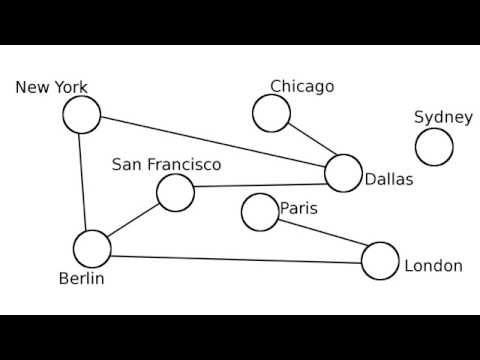

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo("m-KUiibR4Xs",width=640,height=360, cc_load_policy=True)

## 2.2 Representing graphs

&#9989; <font color=red>**QUESTION:**</font> Consider the following graph. How would you represent this graph in python?  Write some python code to represent this graph as an adjacency matrix called `M1` (maybe using 2D list or numpy array). 

<img src="http://www.algolist.net/img/graphs/graph-ir-1.png" width="200"/>
<p style="text-align: right;">
<a href="http://www.algolist.net/">Image from: http://www.algolist.net/</p></a>


In [2]:
# put your code to the above question here.
graph1 = np.array([[0,0,0,1,0],[0,0,0,1,1],[0,0,0,0,1],[1,1,0,0,1],[0,1,1,1,0]])
graph1.shape


(5, 5)

$$ \left[\begin{matrix} 0 & 0 & 0 & 1 & 0 \\
0 & 0& 0 & 1& 1 \\
0 & 0 & 0 & 0 & 1 \\
1 & 1 & 0 & 0 & 1 \\
0 & 1 & 1 & 1 & 0\end{matrix}\right] $$

&#9989; <font color=blue>**DO THIS:**</font> Run the following to check the topology of the graph you just created.

In [3]:
!pip install networkx
!pip install decorator==5.0.9

  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2


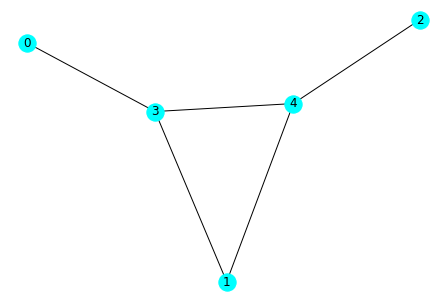

In [4]:
%matplotlib inline

import networkx as nx

G = nx.Graph(graph1)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_color="cyan") # Note the zero indexed node labels

&#9989; <font color=red>**QUESTION:**</font> Now consider the following graph. Represent the following graph with a matrix called `M2` and draw it. __Note__: This is a directed graph with directionality in the graph. Thus, you want to use the `DiGraph` function instead of `Graph`.

<img src="http://www.cs.amherst.edu/ccm/cs31/augraph.jpg" width="200"/>
<p style="text-align: right;">
<a href="http://www.cs.amherst.edu/ccm/cs31">Image from: http://www.cs.amherst.edu/ccm/cs3</p></a>

$$ \left[\begin{matrix} 0 & 0 & 1 & 1 & 0 \\
1 & 0 & 0 & 1& 0 \\
0 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0\end{matrix}\right] $$

In [5]:
# put your codes here
graph2 = np.array([[0,0,1,1,0],[1,0,0,1,0],[0,0,0,1,1],[0,0,0,0,1],[0,0,0,0,0]])

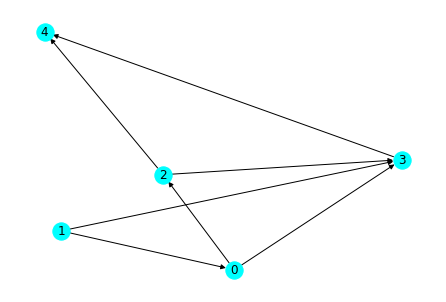

In [7]:
%matplotlib inline

import networkx as nx

G = nx.DiGraph(graph2)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_color="cyan") # Note the zero indexed node labels

If you want to learn more about graph theory, you can take a look of the videos by Dr. Sarada Herke. 

https://www.youtube.com/user/DrSaradaHerke

---
<a name="pagerank"></a>
# 3. Graph application: PageRank 

&#9989; <font color=blue>**DO THIS:**</font> Pageranking is an algorithm used by Google Search to rank websites in their search engine results and the idea is based on graph theory. Watch the following video to get you an idea of the relationship between graph and pagerank. For a more rigorous definition of Page Rank, watch this [optional video](https://www.youtube.com/watch?v=KX1dMAb6LaU).

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo("MG0fIXfrT9A",width=760,height=480)

&#9989; <font color=blue>**DO THIS:**</font> In the video above, a graph was show where the nodes are webpages and the edge are links with direction and weights (page ranks, look at the video at around the 2:40 mark). Write codes that will:

- Represent this graph as an adjacency matrix called `M3` (including the page rank values).
- Draw this graph based on the matrix where the sizes of the nodes are proportional to page ranks. [Hint]: use the `node_size` attribute in the `draw` function. Also, you need to multiply the page rank by a factor of say 1,000 otherwise the nodes will be too small. 

In [10]:
# put you codes here
M3 = np.array([[0,0,0.5,0.5,0],[0,0,1,0,0],[0,0,0,3.5,0],[0,0,0,0,0],[0,0,1,0,0]])
M3

array([[0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 3.5, 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ]])

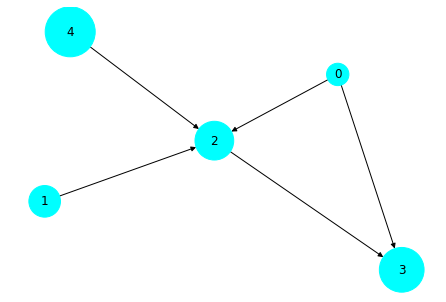

In [15]:
degree = np.array([1,2,3,4,5])*500
G = nx.DiGraph(M3,node_size=degree)
pos=nx.spring_layout(G)
#nx.draw(G, nodelist = list(dict(G.degree()).keys()), with_labels = True, node_color="cyan", node_size=list(dict(G.degree()).values())) # Note the zero indexed node labels
nx.draw(G, nodelist = list(dict(G.degree()).keys()), with_labels = True, node_color="cyan", node_size= degree) # Note the zero indexed node labels


---

<a name="Recursion_Example"></a>

# 4. Graph and recursion

Suppose there is a graph of unknown structure. If you know how many nodes there are and you can start at any node and traverse through the graph at will, then you will be able to recover the graph. This kind of problem can be solved with __recursion__, i.e., having a function calling itself wiht some defined endpoint(s). 

&#9989; <font color=blue>**DO THIS:**</font> Watch the following video shows code in c/c++ but is a great introductin to Recursion.  Ignore the stuff at the end about interviewing. It it interesting but irrelivent to this discussion.

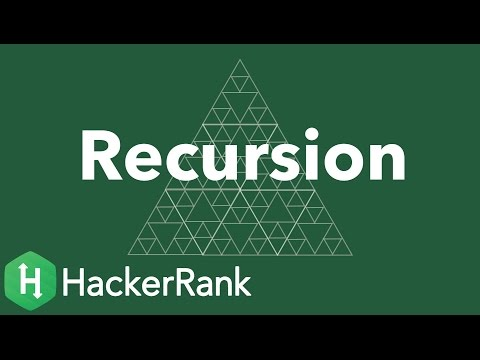

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("KEEKn7Me-ms",width=640,height=360)

&#9989; <font color=blue>**DO THIS:**</font> Run the following is an example that does something similar for listing all files in python.

In [17]:
from IPython.core.display import display, HTML
import glob, os

def findNotebooks(dirstr='.', extention='ipynb'):
    for file in glob.glob(f"{dirstr}/*"):
        if os.path.isdir(file): 
            findNotebooks(f"{file}", extention)
        elif file.endswith(extention):
            display(HTML(f"<a href='{file}' target='_blank'>{file}</a>"))

In [18]:
findNotebooks()

&#9989; <font color=blue>**DO THIS:**</font> See if you can write the ```fib``` function described in the video in Python and test your function with $n=4$ and $n=10$.

Note that `fib(0) = 0`, `fib(1)=1`, `fib(2)=1` in the sequence.

In [23]:
### put your code here

def fib(n):
    k=0
    if n==0:
        return 0
    elif n==1:
        return 1
    elif n==2:
        return 1
    k = fib(n-1)+fib(n-2)
    return k
    
    
       
    

In [25]:
fib(10)

55

----
<a name="wrapup"></a>
# 5. Assignment wrap-up



Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment.

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit this notebook file before the assignment due date.